# Introduction to TensorFlow

### Installation

Your Vagrant box has been loaded with most of the necessary software. If you cannot `import tensorflow as tf`, all you need to do is go to the command line in your Vagrant box and `pip install tensorflow`.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Let's do something simple in pure Python

x1 = 40.0
x2 = x1 * 2.5
print x2

# Let's do the same thing in TensorFlow

# You can name variables however you like using the name argument. 
# The names are there, so you can see them correctly named in a graph
x1 = tf.constant(40.0, name='x1') 
x2 = tf.Variable(x1 * 2.5, name='x2')
print x1, x2


100.0
Tensor("x1_4:0", shape=(), dtype=float32) Tensor("x2_4/read:0", shape=(), dtype=float32)


Notice that it doesn't print out exactly what we want. Instead, it prints out the `__repr__` of TensorFlow objects. TensorFlow uses Symbolic Programming, meaning that TF objects only work with other TF objects. 

The TensorFlow objects (which are nodes in a computation graph) hold rules to do something but by themselves don't do anything. You need to open a TensorFlow `session` to actually execute the code. 

You can compare it to Spark, where most of your code builds a graph, but is lazily evaluated until an action causes things to actually execute.

# Setting up a Session

What we need to do to get TensorFlow to execute computations is to set up a Session. This is very much like a Spark session, as indicated above.

In [10]:
x1 = tf.constant(40.0, name = 'x1') # following along with our data
x2 = tf.Variable(x1*2.5, name = 'x2') # generator from earlier

model = tf.global_variables_initializer() # needed to initialize all variables

with tf.Session() as session: # now that we are inside the session we can 
                              # evaluate the above variables
    session.run(model)
    print(session.run(x1))
    print(session.run(x2))

40.0
100.0


Notice that this "with" syntax is like opening up a file. You need to open a Session to run stuff. Then, you do some stuff. Outside the body of the Session, the Session automatically closes; then, you can't run anything.

TensorFlow constants can come in the form of number objects or arrays. Its operations are vectorized just like Numpy:

In [22]:
# a TensorFlow constants can be just a number or an array
x1 = tf.constant([25.0, 50.0, 100.0], name='x1')

# operations are vectorized like numpy; x1 and x2 are nodes in a graph
x2 = tf.Variable(x1 * 2.5, name='x2')


model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run([x1, x2]))

# IMPORTANT: TensorFlow Variables can be modified like Python variables 
# WITHIN a Session
print "\n"

x = tf.Variable(0, name='x')
model = tf.global_variables_initializer()
with tf.Session() as sess:
    for i in range(5):
        sess.run(model)
        x += 1
        print(sess.run(x)),    


[array([  25.,   50.,  100.], dtype=float32), array([  62.5,  125. ,  250. ], dtype=float32)]


1 2 3 4 5


## Understanding the Graph Concept

tf defines a default graph that is always registered and which can have operations added to it.  You can also define your own graph name as default (for example to carefully control what operations are included in your graph).  [See here for more details](https://www.tensorflow.org/versions/r0.9/api_docs/python/framework.html#Graph)

Here's an example:

In [29]:
"""
Again, here the idea is that we create a graph. TensorFlow variables/placeholders 
as a node in a graph. Each node is creating rules (or logic) to reach the final output.

"""
gr = tf.Graph()

with gr.as_default():
    x1 = tf.constant(40.0, name='x1') 
    print(x1) # since no session is being run, it just prints that x1 is a TensorFlow object
    x2 = tf.Variable(x1 * 2, name='x2')
    print(x2)
# in this simple graph, all we do is put in a number and then the output is twice that number
# x1 is a node, x2 is derived from x1. We need to run a Session so that x2 is evaluated to get an actual number out.

print('\n')

# actually running a session here
with tf.Session(graph=gr) as sess:
    merged = tf.summary.merge_all() # generates a single operation for all nodes
    writer = tf.summary.FileWriter("/tmp/basic", sess.graph)
    model = tf.global_variables_initializer()
    sess.run(model)
    print(sess.run(x2)),

Tensor("x1:0", shape=(), dtype=float32)
Tensor("x2/read:0", shape=(), dtype=float32)


80.0


## Managing sessions

A tensorflow session involves supplying data to and executing all or parts of a computation graph - perhaps iteratively.  There are several (two main) equivalent ways to manage execution of a computation graph:  

Interactive session is the opposite of the 'with' syntax
Here's the 2 syntaxes for opening a file:


    with open(filename) as f:
        do_something_here

    f = open(filename)
    do_something_here
    f.close()


It's the SAME thing with TensorFlow Sessions:

    with tf.Session() as sess:
        do_something_here

    sess = tf.InteractiveSession()
    do_something_here
    sess.close()

With Interactive session, you have to *manually close* the session.

In [31]:
#Interactive session
sess = tf.InteractiveSession() # session opened; body of code underneath

x = tf.constant(list(range(10)))
print x.eval()
print sess.run(x) # remembeer, eval and run are the same; either way works

sess.close() # close session

# do you think if you uncomment the following code, it will run? try it!
#print x.eval()

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Some other features of Tensorflow

Tensorflow is essentially a full-featured programming environment, much like numpy or Spark. In it are dozens of useful operations, for example matrix multiplication, tensor slicing, and memory evaluation. Some of these are demonstrated in other worksheets, available in the folder.

# Actually building a ANN with Tensorflow

## Placeholders

We cannot proceed without talking briefly about placeholders. Placeholders (getting external data and constants into your graph)
"placeholder" is a data type in tensorflow.  
A placeholder is given a name and a dictionary is created with that name as a key. 

The value associated with the key can be anything you want to pass to your network - a minibatch of input data, a learning rate or a learning rate schedule.  The placeholder gets passed by name around your model (computation graph) and when real data are presented through a dictionary, then it follows the step outlined in your model.  Here's a [link](https://www.tensorflow.org/versions/r0.9/api_docs/python/io_ops.html#placeholder) to the function definition for a placeholder.  

As you can see, it's pretty simple.  A data type, a shape and a name. 
You don't have to fill out all of the arguments of the placeholder.  One reason for filling them in is so that tensorflow error checking will pick up mismatches early.  

In [34]:

# here we say, create a thing called x that is "typed". The type is an array that has 3 float elements.
x = tf.placeholder("float", shape=3)
y = x * 2

with tf.Session() as sess: # open session to do something
    result = sess.run(y, feed_dict={x: [4, 5, 6]}) # we are feeding x into y
    print(result)
    # Notice, the tensorflow placeholder called x doesn't 
    # inherently have any numbers.
    # You have to use feed_dict to pass x some actual numbers, 
    # so you can evaluate y.
    # When you use sess.run(y), the output is actual numbers 

# Here, x is a 2-dimensional array;
# x can have any number of rows. x must have 3 columns
x = tf.placeholder("float", shape=(None, 3))
y = x * 2 # this operation is vectorized like numpy

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)
    
    x_data = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]
    result = session.run(y, feed_dict={x: x_data})
    print(result)
    
    #these both work.  
    
    
    # what about this? Uncomment to find out
    """
    x_data = [[1, 2],
              [4, 5],
              [7, 8]]
    result = session.run(y, feed_dict={x: x_data})
    print(result)
    """

[  8.  10.  12.]
[[  2.   4.   6.]
 [  8.  10.  12.]]
[[  2.   4.   6.]
 [  8.  10.  12.]
 [ 14.  16.  18.]]


## Building a simple Neural Net in TF

Basically you can just copy-paste the numpy version of simple neural net.  Just change out the `np` functions for `tf` functions. 

In [38]:
# Data generator -- purely numpy
import numpy as np

sd = 0.2
nRows = 400
X = np.random.uniform(0.0, 1.0, (nRows, 2))
noise = np.random.normal(0.0, sd, nRows)
idx = X[:, 1] > X[:, 0] + noise
Y = np.zeros((nRows, 1))   # You have to be a little more careful 
# with array shapes here.  Explicitly define as matrix.
Y[idx] = 1.0

'''print Y.shape
colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y.reshape(-1)]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()'''



'print Y.shape\ncolorMap = {0.0: "blue", 1.0: "red"}\ncolors = [colorMap[c] for c in Y.reshape(-1)]\nplt.scatter(X[:, 0], X[:, 1], c=colors)\nplt.xlabel("X1")\nplt.ylabel("X2")\nplt.show()'

### Implementation of the ANN

The paradigm shift in symbolic programming is you don't operate on the data directly; you create graphs (which is just a fancy way of saying logic, i.e. add/subtract/etc). When you are done defining your graph, you start tf.Session() and pass in the actual data (where the graph will perform the logic) to get actual results.  

Notice all the below functions use TensorFlow. The reason is that all the inputs are TensorFlow objects (XX, Y, and W). For example, the arguments XX and Y are not actual arrays with numbers; they are placeholders. Inputs are all placeholders. However, the output itself is a node 
since it doesn't contain any actual numbers. It only containts rules to find the numbers (after inserting data).

In [40]:
import tensorflow as tf

def tfS(XX):
    return 1.0 / (1.0 + tf.exp(-XX)) 
    # notice TensorFlow has many functions like numpy, math, random
    # luckily TensorFlow is vectorized like numpy!

def tfNeuralNet(XX, W): # if XX is 1000 by 2, then W is 2 by 1 matrix
    return tfS(tf.matmul(XX, W)) # output is 1000 by 1 matrix, really column vector
    # essentially np.dot(XX, W)

def tfLoss(NNO, Y): # NNO stands for neural net output; includes the sigmoid already
    return tf.reduce_mean((Y - NNO) ** 2)
    # since Y and NNO are both matrices (really just column vectors), 
    # then reduce_mean gets the mean of entire matrix. In this case, really a column mean

def tfGradW(XX, Y, W): # derivative of sigmoid. Vectorized, so finds gradient in matrix form
    arg = tf.matmul(XX, W)
    terms = -2.0 * (Y - tfS(arg)) * tfS(arg) * tfS(-arg)
    # notice that Y - tfS(arg) is column vector, let's say m by 1
    # tfS(arg) and tfS(-arg) are both m by n matrices
    # hence, (Y - tfS(arg)) * tfS(arg) is elemental multiplication that 
    # requires broadcasting to larger shape. 
    # It is not matrix multiplication.
    
    # ...terms is a m * n matrix.
    return tf.reduce_mean((terms * XX), 0)
    # reduce_mean with an index of 0, which means column means
    # terms elementalwise multiply with XX. Look at each column and get the 
    # column means output will be 1 by n matrix--this is your gradient vector!

## Notes: Need to define W as matrix instead of 1-dimensional array

In [42]:
# x and y are both placeholders. They contain no values, only type and shape.
x = tf.placeholder(tf.float32, shape=[None, 2], name='x') 
y = tf.placeholder(tf.float32, shape=[None, 1], name='y') 

# Notice in this example, W2 is a 2 by 1 matrix of weights
# W2 is NOT the scalar that you multiply to x2 in this case.
W2 = tf.Variable(tf.zeros((2,1), dtype=tf.float32), name='W2') 
lr = tf.constant(1.0, dtype=tf.float32, name='lr') # <---- hyper-parameter here: learning rate 

nno = tfNeuralNet(x, W2) # nno stands for neural net output; includes the sigmoid already, basically, y-hat
loss = tfLoss(nno, y) # loss function node
grad = tfGradW(x, y, W2) # gradient function node

### NOTICE! this is how we update the TensorFlow variable 
# it updates W2 in-place AND returns actual W2 numbers when inside Session.run()
train = W2.assign_add(-lr * tf.reshape(grad, tf.shape(W2)))

# The previous lines build the computation graph.
# They create the rules of how the neural net will work but notice that
# no data is fed in yet.

with tf.Session() as sess: # notice the body of this Session is primarily in pure Python, only 2 lines of TensorFlow
    result = sess.run(tf.global_variables_initializer()) # TensorFlow here
    miniBatchSize = 40 # <---- hyper-parameter here
    startEnd = zip(range(0, len(X), miniBatchSize), range(miniBatchSize, len(X) + 1, miniBatchSize))
    resultList = [] 
    nPasses = 50 
    for iPass in range(nPasses): 
        for (s, e) in startEnd:
            
            result = sess.run([loss, grad, train], feed_dict={x: X[s:e,], y: Y[s:e]}) 
            """ MAIN line with TensorFlow: loss is feed-forward,
            grad and train are backpropagation. 
            nno doesn't appear here since 
            I am not storing the y-hat. 
            If you want the y-hats, you can 
            add nno into the list and 
            save the outputs into result.
            """
            resultList.append(result)

print(grad) # value is gone now because outside of Session()

# uncomment the following lines. 
# Do you think you can get the latest gradient values? 

# with tf.Session() as sess:
#     result = sess.run(tf.initialize_all_variables()) # TensorFlow here
#     print sess.run([grad, loss, train], feed_dict={x: X, y: Y})

# It seems that the data not saved is gone. 
# The TensorFlow variables hold no values when the Session is over.

Tensor("Mean_3:0", shape=(2,), dtype=float32)


## Extracting the results

In [43]:
# from left to right:
# [0] to get results from the first iteration, 
# [1] to get element index 1, which is the gradient vector
# [0] to get element index 0 , which is dLoss / dW1
print resultList[0][1][0]

0.048382


Interpret the following command from the `resultList`:

In [44]:
resultList[0]

[0.25, array([ 0.048382 , -0.0468775], dtype=float32), array([[-0.048382 ],
        [ 0.0468775]], dtype=float32)]

loss history


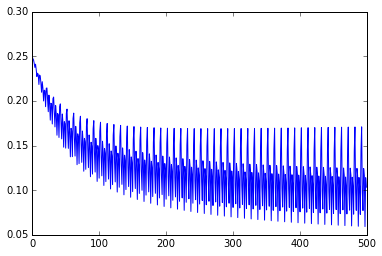

weight histories


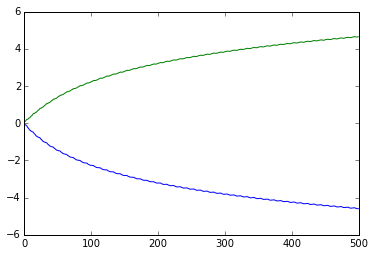

gradient histories


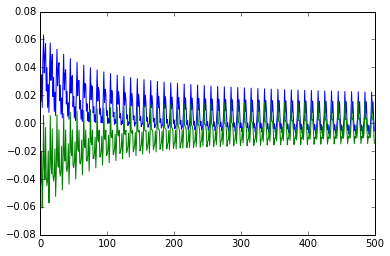

In [45]:
# extract gradients, losses and weights
# This essentially flattens resultList
gTup = [(rl[0], rl[1][0], rl[1][1], rl[2][0], rl[2][1]) for rl in resultList]
# This puts all the gradients together, same for loss and weights
[loss, g0, g1, w0, w1] = zip(*gTup) # use of the * operator


xAxis = np.array(range(len(resultList)))
#plot loss
print 'loss history'
plt.plot(xAxis, loss)
plt.show()

#plot weight histories
print 'weight histories'
plt.plot(xAxis, w0)
plt.plot(xAxis, w1)
plt.show()

#Plot gradient histories
print 'gradient histories'
plt.plot(xAxis, g0)
plt.plot(xAxis, g1)
plt.show()

### Getting the final Weights

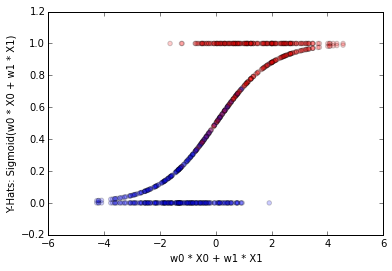

In [46]:
# Extract the latest weights from w0 and w1 which are just 
# python lists, cannot recover the latest weights
# using the graph without running the entire neural net again

actual_weights = np.array([w0[-1][0], w1[-1][0]]).reshape(2, 1) # actual numpy array

# Here's how you would extract y-hats at the last iteration 
# if you are fancy and want to use TensorFlow
with tf.Session() as sess:
    x_axis, y_axis = sess.run([tf.matmul(x,W2), # just X.dot(Weights) 
                               nno], # just Sigmoid(X.dot(Weights))
                              feed_dict={x: X, W2: actual_weights}) # feed in actual data into the nodes

# outside of Session
colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y.reshape(-1)]
plt.scatter(x_axis, Y, c=colors, alpha=0.2)    
plt.scatter(x_axis, y_axis, c=colors, alpha=0.2)
plt.xlabel("w0 * X0 + w1 * X1")
plt.ylabel("Y-Hats: Sigmoid(w0 * X0 + w1 * X1)")
# The notation with w0 and w1 pair and w1 and w2 
# pair for weights are not consistent.
# In any case, it just means there are 2 weights, 
# one for each of the two columns of the X matrix

## Additional Discussion:

**Backpropagation:** All of the above is very, very nice, but we often hear of ANNs with dozens of layers and thousands of nodes per layer (deep learning). How to do that?

    data = tf.placeholder(tf.float32)
    var = tf.Variable(...)              # Must be a tf.float32 or tf.float64 variable.
    loss = some_function_of(var, data)  # some_function_of() returns a `Tensor`.
    var_grad = tf.gradients(loss, [var])[0]

The [`tf.gradients()`](https://www.tensorflow.org/versions/master/api_docs/python/train/#gradients) function will autocalculate the derivatives for us based on the [graph structure](http://colah.github.io/posts/2015-08-Backprop/).

[**MNIST Case Study**](https://www.tensorflow.org/tutorials/mnist/beginners/)

[**Deep Learning with Spark**](https://databricks.com/blog/2016/01/25/deep-learning-with-apache-spark-and-tensorflow.html)